## KNeighborsClassifier Model

In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

### Read the CSV and Perform Basic Data Cleaning

In [2]:
# Import depedencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [4]:
# File path 
data_file = os.path.join("","Resources","data","exoplanet_data.csv")
model_result = os.path.join("","Resources","results","KNNClassifier.csv")

In [5]:
# Read data
df = pd.read_csv(data_file)

In [6]:
# Display Sample data
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
# Check data size
df.shape

(6991, 41)

In [8]:
# Check datafrme for summary and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [9]:
# Check null values
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [10]:
# Column list
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [11]:
# Use label encoding for depdendent variable
number = LabelEncoder()
df['koi_disposition']= number.fit_transform(df['koi_disposition'])

In [12]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

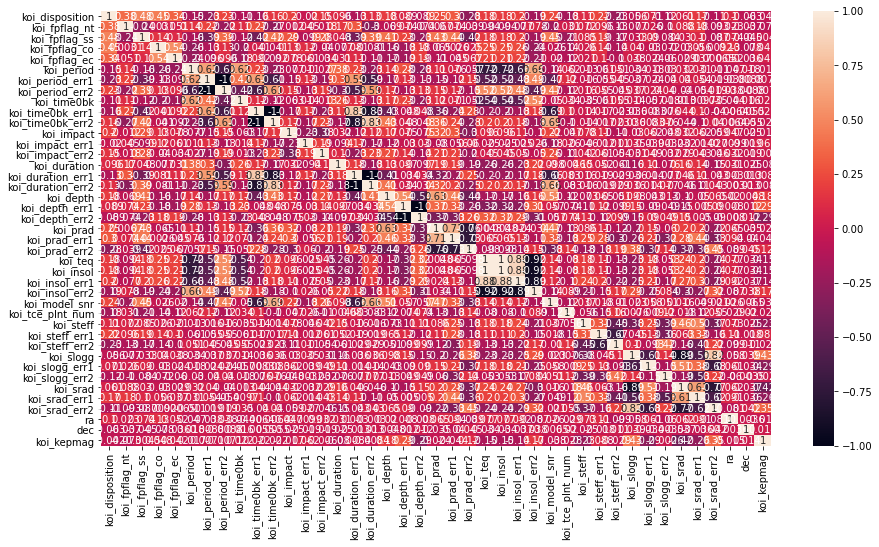

In [13]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

In [14]:
# Let's seperate dependent and independent variables
X= df.drop(columns = ['koi_disposition'])
y = df['koi_disposition']

In [15]:
# Get feature list
feature_name = X.columns.tolist()

In [16]:
# Shape of independent variable or features
X.shape

(6991, 40)

### Pre-processing model performace

In [17]:
# Split data to train and test and check size of train data.
# Using 70-/30 split with random state as 420 (hyper parameter)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=420)

# Print shape of train data
print(X_train.shape)

(4893, 40)


In [18]:
# Scale data

In [19]:
# Get scaler reference
scaler = MinMaxScaler()

In [20]:
# Fit independent variablea or features
scaler.fit(X_train)

MinMaxScaler()

In [21]:
# Transfor features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Check the shape of features
X_train.shape

(4893, 40)

In [23]:
# Build Model
base_model = KNeighborsClassifier(n_neighbors=28)

In [24]:
# Train model
base_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [25]:
# Predict 
pred_base = base_model.predict(X_test)

In [26]:
# Get train and test scores
training_score = round(base_model.score(X_train, y_train)*100,3)
test_score = round(accuracy_score(y_test, pred_base)*100,3)

In [27]:
# Evaluate predictions
print(accuracy_score(y_test, pred_base))
print(confusion_matrix(y_test, pred_base))
print(classification_report(y_test, pred_base))

0.8169685414680649
[[ 242  271    7]
 [  88  425   14]
 [   4    0 1047]]
              precision    recall  f1-score   support

           0       0.72      0.47      0.57       520
           1       0.61      0.81      0.70       527
           2       0.98      1.00      0.99      1051

    accuracy                           0.82      2098
   macro avg       0.77      0.76      0.75      2098
weighted avg       0.82      0.82      0.81      2098



In [28]:
print(f"Training Data Score: {training_score} %")
print(f"Testing Data Score: {test_score} %")

Training Data Score: 83.63 %
Testing Data Score: 81.697 %


In [29]:
# Training results and test results are close.

In [30]:
X=df.drop(columns = ['koi_disposition'])

In [31]:
X.shape

(6991, 40)

# Select Features (columns)

In [32]:
from sklearn.feature_selection import GenericUnivariateSelect,mutual_info_classif
# Get the selected features
trans = GenericUnivariateSelect(score_func= mutual_info_classif, mode='percentile', param=70)
X_tran = trans.fit_transform(X_train, y_train)

In [33]:
print("We started with {0} features but retained only {1} of them!".format(X.shape[1], X_tran.shape[1]))

We started with 40 features but retained only 28 of them!


In [34]:
# Retained columns after feature selection
columns_retained_Select = df.iloc[:, 1:].columns[trans.get_support()].values

In [35]:
# Build Data frame from the selected columns
df= pd.DataFrame(X, columns=columns_retained_Select)

In [36]:
# Display results
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad_err1
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,9.11,2.87,-1.62,25.8,5455,81,-81,0.064,-0.096,0.105
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,39.30,31.04,-10.49,76.3,5853,158,-176,0.044,-0.176,0.233
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,891.96,668.95,-230.35,505.6,5805,157,-174,0.053,-0.168,0.201
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,926.16,874.33,-314.24,40.9,6031,169,-211,0.070,-0.210,0.334
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,427.65,420.33,-136.70,40.2,6046,189,-232,0.054,-0.229,0.315


In [37]:
# Assign new features 
X= df

### Data Scaling

Scale the data using the MinMaxScaler and perform some feature selection

In [38]:
# Get scaler reference
scaler = MinMaxScaler()

In [39]:
# Fit independent variablea or features
scaler.fit(X)

MinMaxScaler()

In [40]:
# Transfor features
X = scaler.transform(X)

In [41]:
# Check the shape of features
X.shape

(6991, 28)

# Create a Train Test Split

In [42]:
# Split df to get train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=420)

In [43]:
# Check train data shape 
X_train.shape

(4893, 28)

In [44]:
# Check test data shape 
X_test.shape

(2098, 28)

# Train the Model



In [45]:
# Instantiate model
model_selectFeature = KNeighborsClassifier(n_neighbors=28)

In [46]:
# Fit the train data
model_selectFeature.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [47]:
# Predictions
pred_selectFeature = model_selectFeature.predict(X_test)

In [48]:
# Get train and test scores
training_selectFeature = round(model_selectFeature.score(X_train, y_train)*100,3)
test_selectFeature = round(accuracy_score(y_test, pred_selectFeature)*100,3)

In [49]:
# Evaluate predictions
print(accuracy_score(y_test, pred_selectFeature))
print(confusion_matrix(y_test, pred_selectFeature))
print(classification_report(y_test, pred_selectFeature))

0.8355576739752145
[[ 318  195    7]
 [ 125  388   14]
 [   4    0 1047]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       520
           1       0.67      0.74      0.70       527
           2       0.98      1.00      0.99      1051

    accuracy                           0.84      2098
   macro avg       0.79      0.78      0.78      2098
weighted avg       0.83      0.84      0.83      2098



In [50]:
print(f"Training Data Score: {training_selectFeature} %")
print(f"Testing Data Score: {test_selectFeature} %")

Training Data Score: 86.818 %
Testing Data Score: 83.556 %


In [51]:
# Model did not score well for two classes (0 and 1) though overall accuranct is 0.84

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [52]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=28) for KNN (the n_neighbors parameter)
# Scoring metric used here is 'accuracy' because it's a classification problem
scores = cross_val_score(model_selectFeature, X, y, cv=10, scoring='accuracy')
print(scores)

[0.79428571 0.80257511 0.81831187 0.85407725 0.8769671  0.81545064
 0.91559371 0.93705293 0.84978541 0.82260372]


In [53]:
# Scores is a numpy array so we can use the mean method
print(scores.mean())

0.8486703453913755


In [54]:
# Search for an optimal value of K for KNN

# Lets try list of integers 1 to 30 integers range
k_range = range(1, 31)

# List of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.8101933374208052, 0.7954610668301656, 0.8290737788677702, 0.8230641733088084, 0.8342227672184753, 0.8353648068669528, 0.836510525240139, 0.8367954220314735, 0.8390864500306561, 0.8388001226241568, 0.8399454322501534, 0.8420913549969345, 0.8422342121397917, 0.8425199264255058, 0.8436644185571225, 0.8445227876558349, 0.8439515634580014, 0.8459527896995708, 0.8442374821173104, 0.8456674841610463, 0.841662374821173, 0.842663192315553, 0.8433787042714082, 0.8449511547108113, 0.8459542203147352, 0.8460960555896179, 0.8488144287758022, 0.8486703453913755, 0.8492430002043736, 0.8492427958307787]


Text(0, 0.5, 'Cross-Validated Accuracy')

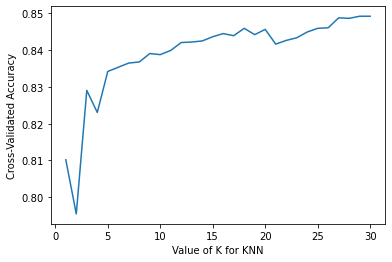

In [55]:
# Plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [56]:
# Create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary - # key: parameter name, # value: list of values that should be searched for that parameter
 
param_grid = dict(n_neighbors=list(range(1, 31)))
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [57]:
# Instantiate the grid
grid = GridSearchCV(model_selectFeature, param_grid, cv=10, scoring='accuracy')

In [58]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=28),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [59]:
# Predictions
pred_tuned = grid.predict(X_test)

In [60]:
# Get train and test scores
training_scoreTuned = round(model_selectFeature.score(X_train, y_train)*100,3)
test_scoreTuned = round(accuracy_score(y_test, pred_tuned)*100,3)

In [61]:
# Evaluate predictions
print(accuracy_score(y_test, pred_tuned))
print(confusion_matrix(y_test, pred_tuned))
print(classification_report(y_test, pred_tuned))

0.8322211630123928
[[ 333  180    7]
 [ 147  366   14]
 [   4    0 1047]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       520
           1       0.67      0.69      0.68       527
           2       0.98      1.00      0.99      1051

    accuracy                           0.83      2098
   macro avg       0.78      0.78      0.78      2098
weighted avg       0.83      0.83      0.83      2098



In [62]:
print(f"Training Data Score: {training_scoreTuned} %")
print(f"Testing Data Score: {test_scoreTuned} %")

Training Data Score: 86.818 %
Testing Data Score: 83.222 %


In [63]:
# Overall accurancy is 0.83.  

### Model Evaluation

In [64]:
predictions = grid.predict(X_test)
classifications = y_test.unique().tolist()

prediction_actual = {
    'Actual': number.inverse_transform(y_test),
    'Prediction': number.inverse_transform(predictions)
}

PA_df = pd.DataFrame(prediction_actual)
PA_df = PA_df.set_index('Actual').reset_index()
PA_df.head(15)

,Actual,Prediction
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,FALSE POSITIVE
2,CONFIRMED,CANDIDATE
3,FALSE POSITIVE,FALSE POSITIVE
4,CONFIRMED,CONFIRMED
5,CONFIRMED,CANDIDATE
6,FALSE POSITIVE,FALSE POSITIVE
7,CONFIRMED,CONFIRMED
8,FALSE POSITIVE,FALSE POSITIVE
9,CANDIDATE,CANDIDATE


In [65]:
# Save results in csv file

In [66]:
evaluations = {'': ['Base Model', 'Select Features Model', 'Tuned Model'],
               'Accuracy': [f"{test_score}%", f"{test_selectFeature}%", f"{test_scoreTuned}%"]}

evaluations_df = pd.DataFrame(evaluations)
evaluations_df = evaluations_df.set_index('')

evaluations_df.to_csv(model_result)
evaluations_df

,Accuracy
,
Base Model,81.697%
Select Features Model,83.556%
Tuned Model,83.222%


## Summary: 
- Base model accuracy of 81.69% was increased to 83.55% due to feature selection and did not improved further but slightly dropped to 83.22% with tuned model (using gridSearch).